# Cover Set Algorithm 1

## Pre_process.py 
- csv 데이터 전처리
  - 컬럼 이름 변경
- csv 데이터 시각화

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def parse_csv(path : str):
    scp_df = pd.read_csv(path)
    scp_df = scp_df.rename(columns={'X0':'X'})
    scp_df = scp_df.rename(columns={'X1':'Y'})
    return scp_df

## Euclid_dist.py
- 유클리드 거리 계산 모듈
  - 원의 중심점 (Cx,Cy)로 부터 대상 점(Px,Py)까지의 거리가 radius보다 작을때 원 안에 포함되므로 True를 반환한다


In [24]:
import math

def isInCircle(Cx, Cy, Px, Py, radius : int):
    dist = math.sqrt((Cx-Px)**2 + (Cy-Py)**2)
    if dist <= radius:
        return True
    else:
        return False


## Make_circle.py

In [25]:
# 각 점을 중심점 삼아 'radius'길이의 반지름을 갖는 원을 생성한다. 
# 생성된 원은 _circle 리스트에 전달(각 원은 리스트 형태이고, 원 안의 점들(인덱스)이 포함된다.)
def make_circle(ax, ay, data, radius):
    _info = []
    _info.append([ax, ay])
    _circle = []
    
    for idx in range(data['X'].size):
        bx = data.values[idx][0]
        by = data.values[idx][1]
        
        if(isInCircle(ax, ay, bx, by, radius)):
            #if ax == bx and ay == by:  # 중심점 제외
            #    continue
            _circle.append(idx)
           
    _info.append(_circle)
    
    return _info, len(_circle) # 원 안의 요소들 집합과 원의 사이즈 리턴

## Make_total_circle.py

In [26]:
def make_total_circle(radius, data):
    totalCircle = []
    totalCircleSize = []
    for idx in range(data['X'].size):
        ax = data.values[idx][0]
        ay = data.values[idx][1]
    
        _circle, _circleSize = make_circle(ax, ay, data, radius)
        totalCircle.append(_circle)
        totalCircleSize.append(_circleSize)
    
    return totalCircle

## Update_unionSet.py

In [27]:
# 합집합 갱신 
def update_unionSet(totalSelectedPoint, unionSet, selectedPoint):
    totalSelectedPoint.append(selectedPoint[0])
    unionSet += selectedPoint[1]
    
    return totalSelectedPoint, unionSet

## Update_data.py

In [28]:
# 데이터 갱신(이미 선택된 점들 제거)
def update_data(unionSet, totalCircle):
    newTotalCircle = []
    unionSet = set(unionSet)
    
    for idx in range(500):
        tempSet = set(totalCircle[idx][1])
        
        tempSet = tempSet - unionSet
        tempSet = list(tempSet)
        
        _temp = [] 
        _temp.append(totalCircle[idx][0])
        _temp.append(tempSet)
        
        newTotalCircle.append(_temp)
        
    return newTotalCircle

## Process.py

In [29]:
# 최적의 중심점들을 도출
def processing(totalCircle):
    unionSet = []
    totalSelectedPoint = []
    
    while len(unionSet) < 500:
        # sort
        totalCircle.sort(key = lambda x:len(x[1]), reverse=True)
        
        # 가장 큰 집합 선택
        selectedPoint = totalCircle[0]
        
        # 좌표 append, 합집합 갱신
        totalSelectedPoint, unionSet = update_unionSet(totalSelectedPoint, unionSet, selectedPoint)
        
        # 처음 좌표의 리스트 기준으로 나머지 리스트 갱신
        totalCircle = update_data(unionSet, totalCircle)
        
        
    return totalSelectedPoint

## Scatter_circles.py

In [30]:
# 시각화
def scatter_circles(selected_point, radius, data):

    fig, ax_nstd = plt.subplots(figsize=(8, 8))

    plt.scatter(data['X'],data['Y'], s=5, alpha=0.7)
    for Cx, Cy in selected_point:
        plt.scatter(Cx, Cy, color = 'k', marker = 'x', s = 10)
        ax_nstd.add_patch(plt.Circle((Cx, Cy), radius, color='g', alpha=0.3))
    plt.show()

## Cover_set_test.py

In [31]:
def cover_set_test(start, end, path) :
    for radius in range(start, end):
        data = parse_csv(path)
        totalCircle = make_total_circle(radius, data)
        totalSelectedPoint = processing(totalCircle)
        print ("반지름 길이: {radius}인 원 생성, 선택된 점들".format(radius=radius))
        print(totalSelectedPoint)

        scatter_circles(totalSelectedPoint, radius, data)
        print("선택된 원의 갯수: {num}".format(num=len(totalSelectedPoint)))
        print("\n\n")

## main.py

반지름 길이: 3인 원 생성, 선택된 점들
[[-8.010849784678102, -6.850366440142775], [2.8216352846256663, 4.136913495172196], [2.0097604567262604, -4.058358305114124], [4.902193048990444, 10.084446430105672], [-8.959881679987339, -1.954042004858892], [-10.000137822905046, -10.425973359602867], [1.0026573338898048, 10.133946904149616], [1.9397566905945585, 0.3143994919246959], [6.527121501791579, 5.53929877867766], [5.036332198569792, -5.64464495166971], [-0.7899674747110494, -6.245615220364826], [-1.6090987939367123, 4.448499709873897], [-6.632172595724741, -9.08632540183337], [-6.605503110707942, -1.6807244277222984], [-11.425554452845542, -2.938408825373928], [5.67644968682797, -2.877536152890145], [5.373740422273478, 12.636983164866734], [-12.281305912234052, -8.64686704463743], [-5.235974902635094, -4.119357783095237], [7.081399420875013, 11.73787445447032], [4.39552307717467, 0.0779761327676382], [-11.52250263011322, -1.8271859527260117], [-0.084620104418859, 4.101145718078247]]


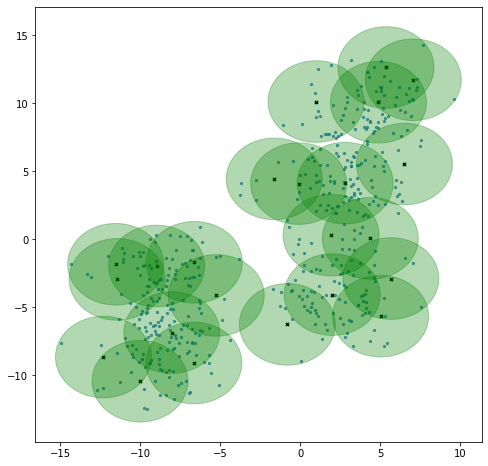

선택된 원의 갯수: 23



반지름 길이: 4인 원 생성, 선택된 점들
[[-8.649891817491874, -5.684867089597169], [3.165740383205282, 5.711748042179282], [2.0984774944542037, -3.045414935398327], [4.001308305478501, 10.12114638073841], [-7.724620995118288, -2.260328529498752], [-9.348037201622468, -9.103370355946586], [-0.1992083041968242, 2.9539362973503978], [3.8052990001756655, -4.127117181077481], [5.918694178312997, 3.88598259899461], [-11.204814662186571, -4.017641854444116], [-0.7899674747110494, -6.245615220364826], [6.602981449243447, 10.705997433542686], [-0.001013471977969, 4.754303239036092], [-4.374133612391172, -7.369407201012914], [3.7808067926339017, 0.4872714712191257], [-11.443027292551411, -8.376975112070273]]


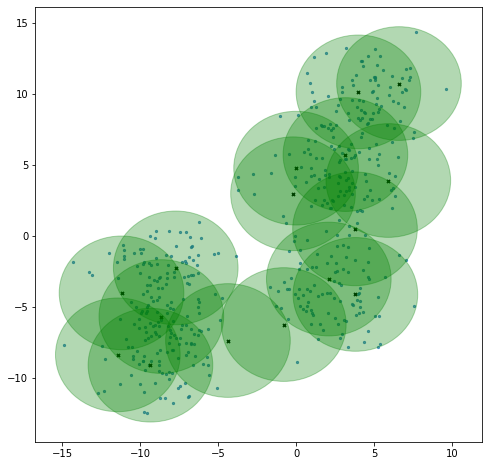

선택된 원의 갯수: 16



반지름 길이: 5인 원 생성, 선택된 점들
[[-8.91602208298329, -5.347868135164285], [3.5223171812533587, 6.426582421982484], [2.897744974955406, -3.491483417874367], [4.917251278171033, 10.152673083710862], [-5.024548921675733, -1.237577313531451], [-8.91100293834021, -8.270829703585381], [-3.7570471750355576, 3.24391647371145], [-9.430385849198451, -1.9022492572817695], [-11.30548107209206, -5.82391966155109], [1.6431304778145952, 2.132506462191932], [-4.374133612391172, -7.369407201012914]]


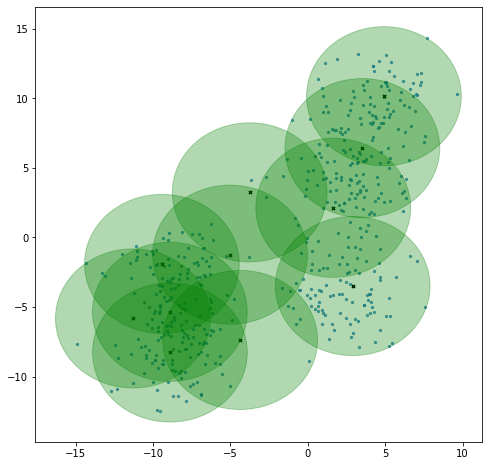

선택된 원의 갯수: 11



반지름 길이: 6인 원 생성, 선택된 점들
[[-8.291357259315681, -5.4065702702099845], [4.156984938875081, 6.981280909433092], [3.023234524154013, -2.3268315984232046], [-9.067849155431764, -6.752484482383727], [-1.0394727059127409, 8.439241779341462], [5.324969010559277, 8.892585913623419], [-9.56628057717473, -3.872627570095711], [-5.699347225248333, -8.50143570587852]]


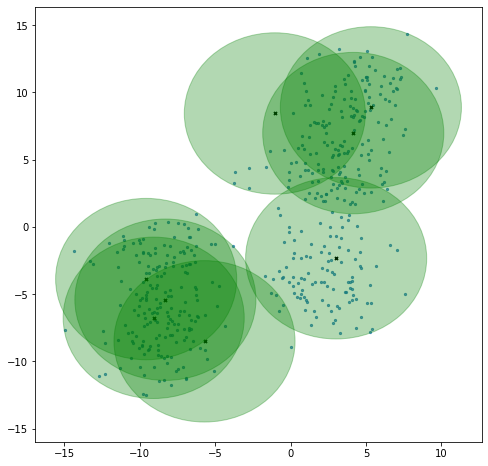

선택된 원의 갯수: 8



반지름 길이: 7인 원 생성, 선택된 점들
[[-4.742216622359665, -4.393417411837817], [3.385481574169793, 6.034352971817848], [3.1995337184891675, -1.4868422282332667], [-8.649891817491874, -5.684867089597169], [4.2132695425860245, 8.289502639044647], [1.287541126983022, 7.58476789330772]]


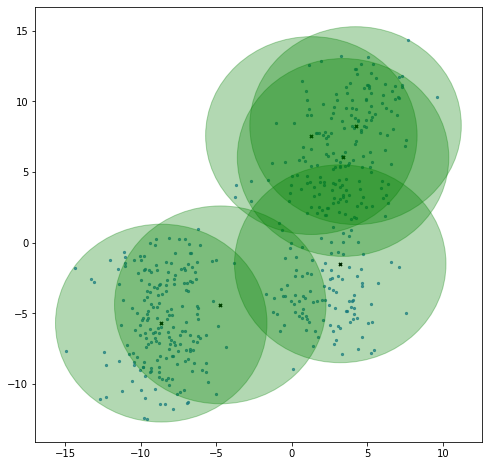

선택된 원의 갯수: 6



반지름 길이: 8인 원 생성, 선택된 점들
[[-4.742216622359665, -4.393417411837817], [3.712652133197576, 5.504660773057796], [3.0386269719719, -0.6747788445141119], [-8.006500575219818, -4.687642144311902], [6.144621941237983, 6.564726480823736]]


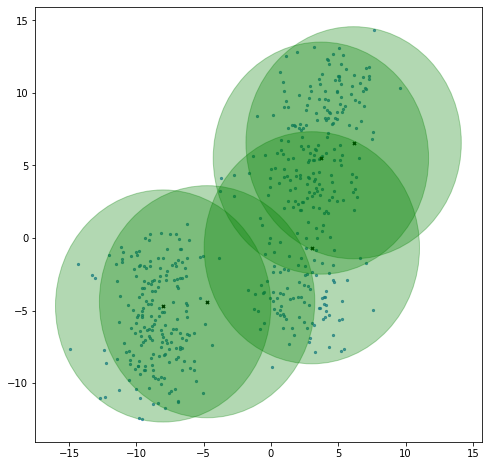

선택된 원의 갯수: 5



반지름 길이: 9인 원 생성, 선택된 점들
[[-1.6977392907099835, -3.612336974545712], [5.31157489544071, 5.734659835725013], [-7.286683221969059, -4.445207896870691], [-0.7899674747110494, -6.245615220364826]]


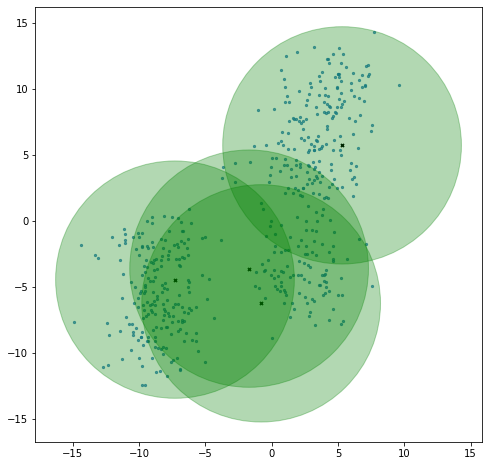

선택된 원의 갯수: 4



반지름 길이: 10인 원 생성, 선택된 점들
[[-3.8297750856743855, -1.4060796338623591], [3.368497270652417, 3.414073322753163], [-4.374133612391172, -7.369407201012914], [-5.679421519533346, -6.547652352063274], [3.2132126722484715, 5.397121372512781]]


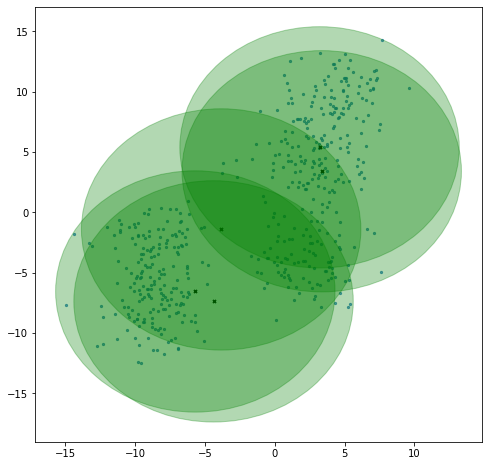

선택된 원의 갯수: 5



반지름 길이: 11인 원 생성, 선택된 점들
[[-3.8297750856743855, -1.4060796338623591], [2.329767113830261, 2.4811811345461683], [-4.742216622359665, -4.393417411837817], [3.144471806755728, 4.457733107278189]]


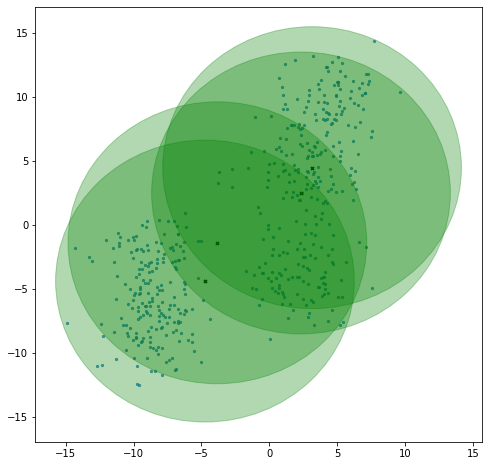

선택된 원의 갯수: 4



반지름 길이: 12인 원 생성, 선택된 점들
[[-0.6651111081018426, 0.8972789237042917], [-6.26848691368119, -1.3793438085686636], [1.167990628657667, 4.27300824406134]]


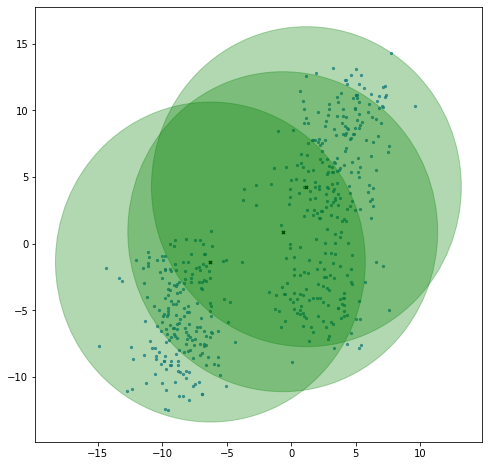

선택된 원의 갯수: 3



반지름 길이: 13인 원 생성, 선택된 점들
[[-0.1150681407415392, -0.345039110058003], [-5.024548921675733, -1.237577313531451], [-0.084620104418859, 4.101145718078247]]


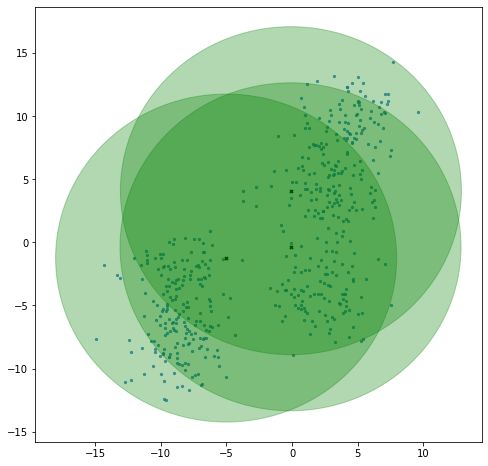

선택된 원의 갯수: 3



반지름 길이: 14인 원 생성, 선택된 점들
[[-0.6651111081018426, 0.8972789237042917], [-3.8297750856743855, -1.4060796338623591], [-0.1992083041968242, 2.9539362973503978]]


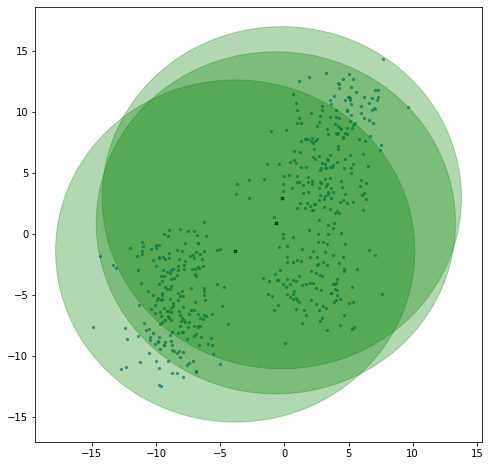

선택된 원의 갯수: 3





In [32]:
cover_set_test(3,15,"scp_data.csv")